In [1]:
# !pip install -r /home/rizki.pratama/project/captcha/captcha/Capcay/requirements1.txt

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import math
import random

# img_folder = "../input/russian-captcha-images-base64/translit/images"
img_folder = "./dataset/"


EPOCH = 500

In [3]:
# df = pd.read_csv('../input/russian-captcha-images-base64/labels.csv', header=None, encoding='utf-8', delimiter=';', names=['text', 'filename'])
df = pd.read_csv('./labels-train1.csv', header=None, encoding='utf-8', delimiter=';', names=['text', 'filename'])

data = {row.text: row.filename for row in df.itertuples()}

input = data
characters = sorted(set(''.join(data.keys())))
char_to_num = {v: i for i, v in enumerate(characters)}

num_to_char = {str(i): v for i, v in enumerate(characters)}
num_to_char['-1'] = 'UKN'

print(num_to_char)

{'0': '2', '1': '3', '2': '4', '3': '5', '4': '6', '5': '7', '6': '8', '7': 'a', '8': 'b', '9': 'c', '10': 'd', '11': 'e', '12': 'f', '13': 'g', '14': 'h', '15': 'k', '16': 'm', '17': 'n', '18': 'p', '19': 'r', '20': 'w', '21': 'x', '22': 'y', '-1': 'UKN'}


In [4]:
# def compute_perf_metric(predictions, groundtruth):
#     if predictions.shape == groundtruth.shape:
#         return np.sum(predictions == groundtruth)/(predictions.shape[0]*predictions.shape[1])
#     else:
#         raise Exception('Error : the size of the arrays do not match. Cannot compute the performance metric')

In [5]:
def encode_single_sample(filename):
    img_path = os.path.join(img_folder, filename)
    # Read image file and returns a tensor with dtype=string
    img = tf.io.read_file(img_path)

    try:
      img = tf.io.decode_png(img, channels=3)
    except Exception as e:
      print(img_path)
      raise e

    # Scales and returns a tensor with dtype=float32
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Transpose the image because we want the time dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])

    return img.numpy()

def create_train_and_validation_datasets():
    # Loop on all the files to create X whose shape is (1040, 50, 200, 1) and y whose shape is (1040, 5)
    X, y = [],[]

    items = list(input.items())
#     train_dataset = items[:10000] + items[-10000:]
#     test_dataset = items[10000:-10000]
    random.shuffle(items)
    train_dataset = items[:80] + items[-15:]
    # test_dataset = items[80:-20]
    test_dataset = [item for item in items if item not in train_dataset]
    all_dataset = train_dataset + test_dataset
    
    y, X = zip(*train_dataset)

    X = np.asarray(list(map(encode_single_sample, X)))
    y = np.asarray([list(map(lambda x:char_to_num[x], label)) for label in y])

#     y = tf.keras.preprocessing.sequence.pad_sequences(y, 7, padding='post', value=-1)
    y = tf.keras.preprocessing.sequence.pad_sequences(y, 6, padding='post', value=-1)
    
    print(X.shape)
    print(y.shape)
    
    # Split X, y to get X_train, y_train, X_val, y_val 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, shuffle=True, random_state=42)
    #X_train, X_val = X_train.reshape(936,200,50,1), X_val.reshape(104,200,50,1)
    return X_train, X_val, y_train, y_val, test_dataset, all_dataset

In [6]:
X_train, X_val, y_train, y_val, test_dataset, all_dataset = create_train_and_validation_datasets()

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)
print(test_dataset)
# print(combined_dataset)
# fig=plt.figure(figsize=(20, 10))
# fig.add_subplot(2, 4, 1)
# plt.imshow(X_train[0], cmap='gray')
# plt.title('Image from X_train with label '+ str(y_train[0]))
# plt.axis('off')
# fig.add_subplot(2, 4, 2)
# plt.imshow(X_train[1], cmap='gray')
# plt.title('Image from X_train with label '+ str(y_train[1]))
# plt.axis('off')
# fig.add_subplot(2, 4, 3)
# plt.imshow(X_val[0], cmap='gray')
# plt.title('Image from X_val with label '+ str(y_val[0]))
# plt.axis('off')
# fig.add_subplot(2, 4, 4)
# plt.imshow(X_val[2], cmap='gray')
# plt.title('Image from X_val with label '+ str(y_val[2]))
# plt.axis('off')


(95, 170, 40, 3)
(95, 6)
(94, 170, 40, 3) (1, 170, 40, 3)
(94, 6) (1, 6)
[('6h4wpg', '6h4wpg.png'), ('y8772y', 'y8772y.png'), ('fa56n7', 'fa56n7.png'), ('kbk7kk', 'kbk7kk.png'), ('r3r55b', 'r3r55b.png'), ('bpky7g', 'bpky7g.png')]


2024-06-21 04:16:18.304430: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-21 04:16:18.304494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (coe): /proc/driver/nvidia/version does not exist
2024-06-21 04:16:18.306252: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanu

In [7]:
# Let's create a new CTCLayer by subclassing
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        #label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        labels_mask = 1 - tf.cast(tf.equal(y_true, -1), dtype="int64")
        labels_length = tf.reduce_sum(labels_mask, axis=1)
        loss = self.loss_fn(y_true, y_pred, input_length, tf.expand_dims(labels_length, -1))
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

def build_model():
    
    # Inputs to the model
#     input_img = layers.Input(shape=(200,60,3), name="image", dtype="float32") 
#     labels = layers.Input(name="label", shape=(7, ), dtype="float32")

    input_img = layers.Input(shape=(170,40,3), name="image", dtype="float32") 
    labels = layers.Input(name="label", shape=(6, ), dtype="float32")

    # First conv block
    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model 
#     x = layers.Reshape(target_shape=(50, 960), name="reshape")(x)
    x = layers.Reshape(target_shape=(42, 640), name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(len(characters)+1, activation="softmax", name="dense2")(x) # 20 = 19 characters + UKN

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="ocr_cnn_lstm_model")
    
    # Compile the model and return
    model.compile(optimizer=keras.optimizers.Adam())
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_cnn_lstm_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 170, 40, 3)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 170, 40, 32)  896         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 85, 20, 32)   0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 85, 20, 64)   18496       pool1[0][0]                      
_________________________________________________________________________________

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(lambda x,y: {'image':x, 'label':y}).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)
print(train_dataset)


validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation_dataset = validation_dataset.map(lambda x,y: {'image':x, 'label':y}).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset shapes: {image: (None, 170, 40, 3), label: (None, 6)}, types: {image: tf.float32, label: tf.int32}>


In [9]:
# def lr_step_decay(epoch, lr):
#     drop_rate = 0.5
#     epochs_drop = 10.0
#     initial_learning_rate = 0.001
#     return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))


# lrate = tf.keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=0)

# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=30, restore_best_weights=True)

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCH, callbacks=[early_stopping])

Epoch 1/500


2024-06-21 04:16:24.041377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


6/6 [==============================] - 8s 403ms/step - loss: 53.8271 - val_loss: 22.7892
Epoch 2/500
6/6 [==============================] - 1s 147ms/step - loss: 23.0492 - val_loss: 23.0839
Epoch 3/500
6/6 [==============================] - 1s 143ms/step - loss: 21.3031 - val_loss: 20.8572
Epoch 4/500
6/6 [==============================] - 1s 162ms/step - loss: 21.0321 - val_loss: 20.3204
Epoch 5/500
6/6 [==============================] - 1s 191ms/step - loss: 20.5398 - val_loss: 20.3543
Epoch 6/500
6/6 [==============================] - 1s 170ms/step - loss: 20.5450 - val_loss: 20.0673
Epoch 7/500
6/6 [==============================] - 1s 216ms/step - loss: 20.4374 - val_loss: 19.9890
Epoch 8/500
6/6 [==============================] - 1s 162ms/step - loss: 20.4360 - val_loss: 20.0215
Epoch 9/500
6/6 [==============================] - 1s 151ms/step - loss: 20.4079 - val_loss: 20.1382
Epoch 10/500
6/6 [==============================] - 1s 143ms/step - loss: 20.3789 - val_loss: 20.1315
E

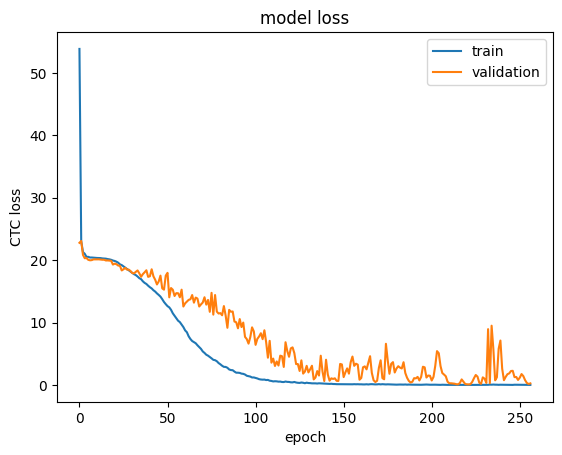

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('CTC loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()
prediction_model.save("model.h5")

def get_model(path):
    model = keras.models.load_model(path)
    return model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 170, 40, 3)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 170, 40, 32)       896       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 85, 20, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 85, 20, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 42, 10, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 42, 640)           0         
_________________________________________________________________
dense1 (Dense)               (None, 42, 64)            41024 

In [12]:
m = get_model("model.h5")
y_pred = m.predict(X_val)
y_pred = keras.backend.ctc_decode(y_pred, input_length=np.ones(X_val.shape[0])*42, greedy=True) # decoding -> y_pred[0].shape = (104,5)
#y_pred[0][0][X][0:7] corresponds to the prediction of one image (with X in [0,...,103])
#it is a tensor whose corresponding numpy array is for example [15,  7, 15, 12,  8]
# y_pred = y_pred[0][0][0:X_val.shape[0],0:7].numpy() 
y_pred = y_pred[0][0][0:X_val.shape[0],0:6].numpy() 
#array([[ 2,  2,  8,  0,  0],
#       [15,  7, 15, 12,  8],
#       ...
#       [13, 17, 13, 16,  2],
#       [10,  3, 14,  4,  4]])

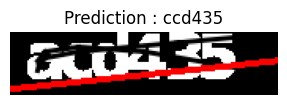

In [13]:

nrow = 1
fig=plt.figure(figsize=(20, 5))
for i in range(len(X_val)):
    if i>4: nrow = 2
    fig.add_subplot(nrow, 5, i+1)
    plt.imshow(X_val[i].transpose((1,0,2)),cmap='gray')
    pred_txt = ''.join(list(map(lambda x:num_to_char[str(x)] if x>-1 else '', y_pred[i])))
    plt.title('Prediction : ' + pred_txt)
    plt.axis('off')
plt.show()    

In [14]:
# compute_perf_metric(y_pred, y_val)

In [15]:
test_dataset

[('6h4wpg', '6h4wpg.png'),
 ('y8772y', 'y8772y.png'),
 ('fa56n7', 'fa56n7.png'),
 ('kbk7kk', 'kbk7kk.png'),
 ('r3r55b', 'r3r55b.png'),
 ('bpky7g', 'bpky7g.png')]

In [28]:

# def create_test_dataset():
#     X, y = [],[]
#     for item in test_dataset:
#         img = tf.io.read_file(f"./dataset/{item[1]}")
# #         img = tf.io.decode_jpeg(img, channels=3) 
#         img = tf.io.decode_png(img, channels=3) 
#         img = tf.image.convert_image_dtype(img, tf.float32)
# #         img = tf.image.resize(img, [40, 150])
#         img = tf.transpose(img, perm=[1, 0, 2])
#         img = img.numpy()
#         X.append(img)
#         y.append(item[0])
#     # y = tf.keras.preprocessing.sequence.pad_sequences(y, 7, padding='post', value=-1)
#     X = np.asarray(X)
#     y = np.asarray(y)
    
#     return X,y

def create_test_dataset(path, dataset):
    X, y = [],[]
    for item in dataset:
        img_path = os.path.join(path, item[1])
        img = tf.io.read_file(img_path)
        img = tf.io.decode_png(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = img.numpy()
        X.append(img)
        y.append(item[0])
    
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y



data_path = "./dataset"
X_test, file_names = create_test_dataset(path=data_path, dataset=test_dataset)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [29]:
test_pred = m.predict(X_test)
test_pred = keras.backend.ctc_decode(test_pred, input_length=np.ones(X_test.shape[0])*42, greedy=True)
test_pred = test_pred[0][0][0:X_test.shape[0],0:6].numpy()

In [30]:
answers = ["".join(list(map(lambda x:num_to_char[str(x)], label))).replace("UKN",'') for label in test_pred]
# answers = ["".join(list(map(lambda x:num_to_char[str(x)], label))).replace("UKN",'!') for label in test_pred]
answers[:10]


['6h4wg', 'y8772y', 'fa56n7', 'kbk7kk', 'r3r55b', 'bpky7g']

In [19]:
all_dataset

[('6h4wpg', '6h4wpg.png'),
 ('y8772y', 'y8772y.png'),
 ('fa56n7', 'fa56n7.png'),
 ('kbk7kk', 'kbk7kk.png'),
 ('r3r55b', 'r3r55b.png'),
 ('bpky7g', 'bpky7g.png')]

In [20]:
result = {
    'file_name': file_names,
    'answer': answers
}

result_df = pd.DataFrame(result)

# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)

In [31]:
from sklearn.metrics import accuracy_score

# Fungsi untuk menghitung persentase kata yang benar
def word_accuracy_rate(y_true, y_pred):
    correct_words = sum([1 for true, pred in zip(y_true, y_pred) if true == pred])
    return correct_words / len(y_true) * 100

# Fungsi untuk menghitung persentase karakter yang benar
def character_accuracy_rate(y_true, y_pred):
    total_chars = sum([len(true) for true in y_true])
    correct_chars = sum([sum([1 for t, p in zip(true, pred) if t == p]) for true, pred in zip(y_true, y_pred)])
    return correct_chars / total_chars * 100

# Label asli (y_true) dan hasil prediksi (answers)
y_true = file_names  # file_names di sini harus berupa label asli yang diambil dari data validasi
y_pred = answers

# Menghitung persentase kata yang benar
word_accuracy = word_accuracy_rate(y_true, y_pred)
print(f"Word Accuracy Rate: {word_accuracy:.2f}%")

# Menghitung persentase karakter yang benar
char_accuracy = character_accuracy_rate(y_true, y_pred)
print(f"Character Accuracy Rate: {char_accuracy:.2f}%")


Word Accuracy Rate: 83.33%
Character Accuracy Rate: 94.44%


In [22]:
# !pip3 install pipreqsnb

In [23]:
# !pipreqsnb --savepath /kaggle/working/requirements1.txt 
# !pip3 freeze > /kaggle/working/requirements2.txt  

In [24]:
# !python --version

In [25]:
# import pkg_resources
# import types
# def get_imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             # Split ensures you get root package, 
#             # not just imported function
#             name = val.__name__.split(".")[0]

#         elif isinstance(val, type):
#             name = val.__module__.split(".")[0]

#         # Some packages are weird and have different
#         # imported names vs. system names
#         if name == "PIL":
#             name = "Pillow"
#         elif name == "sklearn":
#             name = "scikit-learn"

#         yield name
# imports = list(set(get_imports()))

# requirements = []
# for m in pkg_resources.working_set:
#     if m.project_name in imports and m.project_name!="pip":
#         requirements.append((m.project_name, m.version))

# for r in requirements:
#     print("{}=={}".format(*r))

In [26]:
# import pkg_resources
# for dist in pkg_resources.working_set:
#     print(f'{dist.project_name}=={dist.version}')